# Car Insurance Claim Linear Regression Model



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.options.display.max_rows = 100
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import statsmodels.api as sm

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def fill_whitespace_with_underscore(df):
    """ returns a df with whitespace replaced with underscores"""
    if isinstance(df,pd.core.frame.DataFrame):
        df.columns = df.columns.str.replace(' ','_')
        df.columns = df.columns.str.replace('-','_')
    else:
        raise TypeError
    return df

In [3]:
def Remove_Outlier_Indices(df):
    """ returns a df of boolean values to used to index a trimmed table in the 1.5*IQR range"""
    if isinstance(df,pd.core.frame.DataFrame):
        Q1 = df.quantile(0.15)
        Q3 = df.quantile(0.85)
        IQR = Q3 - Q1
        trueList = ~((df < (Q1 - 1.5*IQR)) |(df > (Q3 + 1.5*IQR)))
    else:
        raise TypeError
    return trueList

In [4]:
c2_df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [5]:
c2_df.drop(['Unnamed: 0','effective_to_date'],axis=1,inplace=True)

In [6]:
c2_df.columns

Index(['region', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'month', 'employment_status', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
X = c2_df.drop(['total_claim_amount'], axis=1) # trimmed target var
y = c2_df.total_claim_amount # trimmed independent var (vec)`

dM_n = X.select_dtypes(exclude=object)
dM_c = pd.get_dummies(X.select_dtypes(include=object),prefix="dmy",drop_first=True)

# Index List of Non-Outliers
nonOutlierList = Remove_Outlier_Indices(dM_n)

dM_c = dM_c[nonOutlierList.all(1)]
dM_n = dM_n[nonOutlierList.all(1)]

X = pd.concat([dM_n,dM_c],axis=1)
y = y[nonOutlierList.all(1)]

In [8]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,dmy_east,dmy_north west,dmy_west region,...,dmy_branch,dmy_call center,dmy_web,dmy_luxury car,dmy_luxury suv,dmy_sports car,dmy_suv,dmy_two-door car,dmy_medsize,dmy_small
0,4809,48029,61,7,52,0,9,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,26794,64,3,26,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,1,0,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,15,31,1,7,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10680,4547,33531,116,11,15,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
10681,3579,28304,91,10,30,2,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10683,19228,56544,187,14,32,0,2,0,0,0,...,1,0,0,0,1,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [9]:
TEST_SIZE = .25
RANDOM_STATE = 123 # reproduce the same results. disables randomization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,random_state=RANDOM_STATE)

In [10]:
X_train.dtypes

customer_lifetime_value          int64
income                           int64
monthly_premium_auto             int64
months_since_last_claim          int64
months_since_policy_inception    int64
number_of_open_complaints        int64
number_of_policies               int64
dmy_east                         uint8
dmy_north west                   uint8
dmy_west region                  uint8
dmy_yes                          uint8
dmy_extended                     uint8
dmy_premium                      uint8
dmy_college                      uint8
dmy_doctor                       uint8
dmy_high school or below         uint8
dmy_master                       uint8
dmy_jan                          uint8
dmy_employed                     uint8
dmy_medical leave                uint8
dmy_retired                      uint8
dmy_unemployed                   uint8
dmy_m                            uint8
dmy_suburban                     uint8
dmy_urban                        uint8
dmy_married              

In [11]:
X_train[dM_n.columns]

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
5123,10972,24164,137,2,40,0,5
10260,5746,61990,72,21,47,0,9
7753,7462,70263,93,30,66,0,5
4409,7122,64571,89,34,91,0,6
479,8879,52583,113,12,59,0,7
...,...,...,...,...,...,...,...
8164,3979,47828,112,11,3,0,1
8590,8200,25381,71,22,62,0,2
5777,6832,66627,85,32,55,0,8
1485,4014,37384,99,9,17,0,1


In [12]:
transformer = StandardScaler()
transformer.fit(X_train[dM_n.columns] )

X_test[dM_n.columns] = transformer.transform(X_test[dM_n.columns])
X_train[dM_n.columns] = transformer.transform(X_train[dM_n.columns])

### Apply linear regression model

In [13]:
model = LinearRegression()   # model is y = SUM(slopes*Xs) + intercept
model.fit(X_train, y_train) # compute for me the coefficients (slopes and intercept)
y_pred       = model.predict(X_test)   # model prediction [test]
y_pred_train = model.predict(X_train)  # model prediction [train]

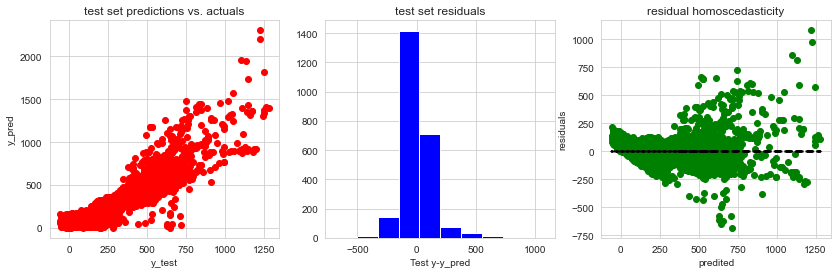

In [34]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

# forms a line?
ax[0].plot(y_pred, y_test, 'o', color='red')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("test set predictions vs. actuals")

# normal distribution?
ax[1].hist(y_test - y_pred, color='blue')
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("test set residuals")

# constant?
ax[2].plot(y_pred,y_test - y_pred,"o", color='green')
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("residual homoscedasticity")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed', color='black',linewidth=2)

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

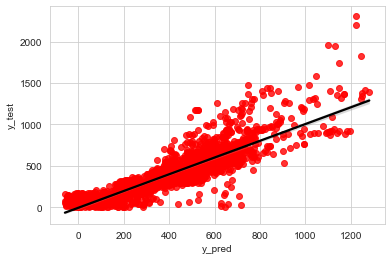

In [15]:
sns.regplot(x='y_pred',y='y_test', data=pd.DataFrame({"y_test": y_test, "y_pred": y_pred}) ,
            scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [16]:
R2     = r2_score(y_test,y_pred)
Adj_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

R2,Adj_R2

(0.7426488809803674, 0.7372034489232444)

In [17]:
X_train_const_ct = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X_train_const_ct).fit()
predictions_train = model.predict(X_train_const_ct)

X_test_const_ct = sm.add_constant(X_test) # adding a constant
predictions_test = model.predict(X_test_const_ct)
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     469.0
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:50:46   Log-Likelihood:                -45426.
No. Observations:                7241   AIC:                         9.095e+04
Df Residuals:                    7192   BIC:                         9.129e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [18]:
model.params

const                            1.037792e+02
customer_lifetime_value         -1.880788e+00
income                          -6.879812e+00
monthly_premium_auto             1.375352e+02
months_since_last_claim          3.715650e+00
months_since_policy_inception   -1.747236e+00
number_of_open_complaints       -3.232310e+00
number_of_policies               3.686445e+00
dmy_east                         3.707273e+00
dmy_north west                   7.124066e-01
dmy_west region                  1.096442e+01
dmy_yes                         -1.808123e+01
dmy_extended                    -1.225784e+01
dmy_premium                     -6.975014e+00
dmy_college                     -8.332455e+00
dmy_doctor                      -1.540634e+01
dmy_high school or below         1.022052e+01
dmy_master                      -1.044332e+01
dmy_jan                          2.835529e+00
dmy_employed                    -1.949290e+00
dmy_medical leave                9.355531e+00
dmy_retired                      8

In [19]:
sigparams = model.params[list(np.where(model.pvalues < 0.05)[0])].iloc[0:].index.tolist()
sigparams

['const',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'number_of_open_complaints',
 'number_of_policies',
 'dmy_west region',
 'dmy_yes',
 'dmy_extended',
 'dmy_college',
 'dmy_high school or below',
 'dmy_unemployed',
 'dmy_m',
 'dmy_suburban',
 'dmy_urban',
 'dmy_single',
 'dmy_offer2',
 'dmy_luxury car',
 'dmy_luxury suv']

In [20]:
from statsmodels.formula.api import ols

In [21]:
X_train_df = fill_whitespace_with_underscore(pd.DataFrame(X_train, columns=X.columns))
y_train_df = pd.DataFrame(y_train)
data = pd.concat([X_train_df, y_train_df], axis=1)

In [22]:
headers = list(data.columns[:-1])
headers

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'dmy_east',
 'dmy_north_west',
 'dmy_west_region',
 'dmy_yes',
 'dmy_extended',
 'dmy_premium',
 'dmy_college',
 'dmy_doctor',
 'dmy_high_school_or_below',
 'dmy_master',
 'dmy_jan',
 'dmy_employed',
 'dmy_medical_leave',
 'dmy_retired',
 'dmy_unemployed',
 'dmy_m',
 'dmy_suburban',
 'dmy_urban',
 'dmy_married',
 'dmy_single',
 'dmy_personal_auto',
 'dmy_special_auto',
 'dmy_corporate_l2',
 'dmy_corporate_l3',
 'dmy_personal_l1',
 'dmy_personal_l2',
 'dmy_personal_l3',
 'dmy_special_l1',
 'dmy_special_l2',
 'dmy_special_l3',
 'dmy_offer2',
 'dmy_offer3',
 'dmy_offer4',
 'dmy_branch',
 'dmy_call_center',
 'dmy_web',
 'dmy_luxury_car',
 'dmy_luxury_suv',
 'dmy_sports_car',
 'dmy_suv',
 'dmy_two_door_car',
 'dmy_medsize',
 'dmy_small']

In [23]:
eqn = 'total_claim_amount~' + '+'.join(headers)
eqn

'total_claim_amount~customer_lifetime_value+income+monthly_premium_auto+months_since_last_claim+months_since_policy_inception+number_of_open_complaints+number_of_policies+dmy_east+dmy_north_west+dmy_west_region+dmy_yes+dmy_extended+dmy_premium+dmy_college+dmy_doctor+dmy_high_school_or_below+dmy_master+dmy_jan+dmy_employed+dmy_medical_leave+dmy_retired+dmy_unemployed+dmy_m+dmy_suburban+dmy_urban+dmy_married+dmy_single+dmy_personal_auto+dmy_special_auto+dmy_corporate_l2+dmy_corporate_l3+dmy_personal_l1+dmy_personal_l2+dmy_personal_l3+dmy_special_l1+dmy_special_l2+dmy_special_l3+dmy_offer2+dmy_offer3+dmy_offer4+dmy_branch+dmy_call_center+dmy_web+dmy_luxury_car+dmy_luxury_suv+dmy_sports_car+dmy_suv+dmy_two_door_car+dmy_medsize+dmy_small'

In [24]:
model = ols(formula=eqn,data=data).fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     469.0
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:50:46   Log-Likelihood:                -45426.
No. Observations:                7241   AIC:                         9.095e+04
Df Residuals:                    7192   BIC:                         9.129e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       103.7792     13.679      7.587      0.000      76.964     130.594
customer_lifetime_value          -1.8808      1.611     -1.168      0.243      -5.039       1.277
income                           -6.8798      1.748     -3.936      0.000     -10.306      -3.454
monthly_premium_auto            137.5352      4.198     32.764      0.000     129.306     145.764
months_since_last_claim           3.7157      1.522      2.441      0.015       0.732       6.699
months_since_policy_inception    -1.7472      1.532     -1.140      0.254      -4.751       1.256
number_of_open_complaints        -3.2323      1.528     -2.116      0.034      -6.227      -0.238
number_of_policies                3.6864      1.536      2.400      0.016       0.675       6.697
dmy_east                          3.7073      5.945      0.624      0.533      -7.948      15.362
dmy_north_west                    0.7124      4.032      0.177      0.860      -7.192       8.617
dmy_west_region                  10.9644      3.850      2.848      0.004       3.417      18.512
dmy_yes                         -18.0812      4.972     -3.637      0.000     -27.828      -8.334
dmy_extended                    -12.2578      4.582     -2.675      0.007     -21.239      -3.277
dmy_premium                      -6.9750      8.940     -0.780      0.435     -24.500      10.550
dmy_college                      -8.3325      3.944     -2.113      0.035     -16.063      -0.602
dmy_doctor                      -15.4063      8.391     -1.836      0.066     -31.855       1.043
dmy_high_school_or_below         10.2205      3.993      2.560      0.010       2.394      18.047
dmy_master                      -10.4433      6.081     -1.717      0.086     -22.364       1.477
dmy_jan                           2.8355      3.044      0.932      0.352      -3.131       8.802
dmy_employed                     -1.9493      7.826     -0.249      0.803     -17.290      13.392
dmy_medical_leave                 9.3555      9.919      0.943      0.346     -10.089      28.800
dmy_retired                       0.0896     11.639      0.008      0.994     -22.726      22.905
dmy_unemployed                   82.1672      8.264      9.943      0.000      65.967      98.367
dmy_m                            11.1653      3.067      3.641      0.000       5.153      17.177
dmy_suburban                    366.7171      4.383     83.662      0.000     358.124     375.310
dmy_urban                       215.7159      4.981     43.310      0.000     205.952     225.480
dmy_married                      -6.2472      4.557     -1.371      0.170     -15.180       2.686
dmy_single                       61.9498      5.239     11.825      0.000      51.680      72.219
dmy_personal_auto             -2.186e+13   1.